# Import libraries

In [56]:
# Import libraries

from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
# import optimizers
from keras import optimizers
import keras.utils as image
import numpy as np
import matplotlib.pyplot as plt

# Import data

In [5]:
# Import libraries

import os, shutil

# The path to the directory where the original
original_dataset_dir = './dogs-vs-cats-data/train'

base_dir = './dogs-vs-cats-data-small'
os.mkdir(base_dir)

# Create a directory for the smaller dataset
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)



In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total validation cat images: 500
total test cat images: 500
total training dog images: 1000
total validation dog images: 500
total test dog images: 500


# Models

## First model: using convolutional layers

In this part we'll build a model using convolutional layers. We'll use the `ImageDataGenerator` class to load the images from the disk and feed them to the network.

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



2023-11-20 09:14:35.964620: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/lib/x86_64-linux-gnu/:/usr/local/cuda-11/targets/x86_64-linux/lib/:/opt/oracle:/opt/oracle/lib/:
2023-11-20 09:14:35.965239: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-20 09:14:35.965286: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (killuamam-KLVL-WXX9): /proc/driver/nvidia/version does not exist
2023-11-20 09:14:35.966535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable th

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [11]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [48]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = test_data_gen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')


print(len(train_generator))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
100


In [19]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [20]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

/tmp/ipykernel_11024/4224276573.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)


Epoch 1/30
100/100 [==============================] - 47s 460ms/step - loss: 0.7493 - acc: 0.5135 - val_loss: 0.7021 - val_acc: 0.4990
Epoch 2/30
100/100 [==============================] - 34s 339ms/step - loss: 0.6955 - acc: 0.5360 - val_loss: 0.6857 - val_acc: 0.5250
Epoch 3/30
100/100 [==============================] - 34s 340ms/step - loss: 0.6828 - acc: 0.6005 - val_loss: 0.6227 - val_acc: 0.6480
Epoch 4/30
100/100 [==============================] - 33s 330ms/step - loss: 0.6350 - acc: 0.6555 - val_loss: 0.7429 - val_acc: 0.6020
Epoch 5/30
100/100 [==============================] - 33s 327ms/step - loss: 0.5804 - acc: 0.6855 - val_loss: 0.6344 - val_acc: 0.6860
Epoch 6/30
100/100 [==============================] - 33s 327ms/step - loss: 0.5729 - acc: 0.7505 - val_loss: 0.6003 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 33s 327ms/step - loss: 0.4784 - acc: 0.7660 - val_loss: 0.6298 - val_acc: 0.6740
Epoch 8/30
100/100 [==============================] - 3

In [24]:
model.save('cats_and_dogs_small_1.h5')
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


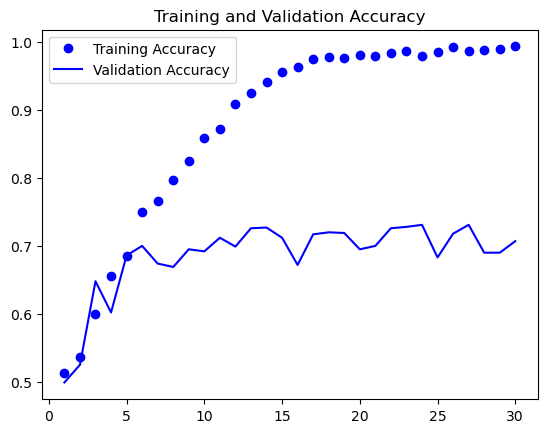

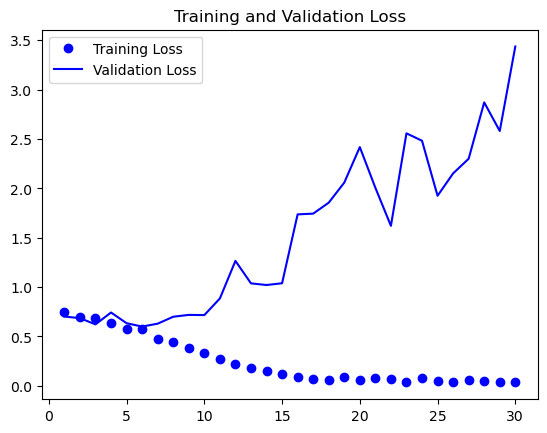

In [25]:
# Plotting the results

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

We can observe that we tend to overfit after 6-7 epochs: The training accuracy is nearly 100% with high epochs, but the validation accuracy is only 70% in the best case. One way to have better results is data augmentation.

## Second model: using data augmentation

In [76]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


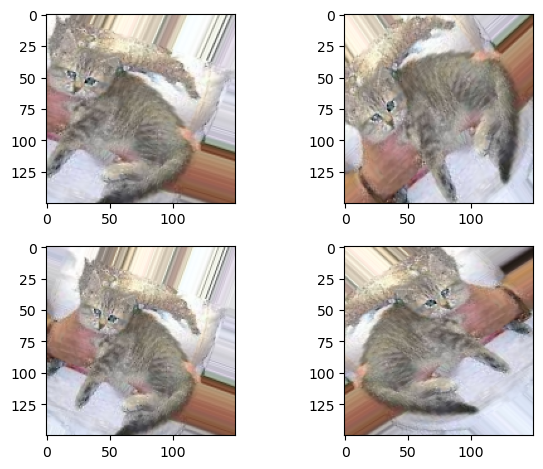

In [38]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[2]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

fig, axes = plt.subplots(nrows=2, ncols=2)  # Creating a 2x2 grid of subplots

for ax in axes.flatten():
    if i == 4:
        break
    for batch in datagen.flow(x, batch_size=1):
        imgplot = ax.imshow(image.array_to_img(batch[0]))
        i += 1
        break


plt.tight_layout()  # Adjust layout for better visualization
plt.show()


with this we can have a bigger set of images to train on, but the problem is that the dataset is small and we are generating images from the same images, so we will have a lot of correlation between the images, so we will use a dropout layer to reduce the overfitting.

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [49]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

print(len(train_generator))
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
100
Found 1000 images belonging to 2 classes.


/tmp/ipykernel_11024/3752995051.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 37s 365ms/step - loss: 0.6751 - acc: 0.5765 - val_loss: 0.6546 - val_acc: 0.6010
Epoch 2/100
100/100 [==============================] - 38s 379ms/step - loss: 0.6682 - acc: 0.5925 - val_loss: 0.6415 - val_acc: 0.6260
Epoch 3/100
100/100 [==============================] - 37s 366ms/step - loss: 0.6551 - acc: 0.5985 - val_loss: 0.6557 - val_acc: 0.5980
Epoch 4/100
100/100 [==============================] - 36s 360ms/step - loss: 0.6369 - acc: 0.6330 - val_loss: 0.6507 - val_acc: 0.6040
Epoch 5/100
100/100 [==============================] - 37s 366ms/step - loss: 0.6243 - acc: 0.6435 - val_loss: 0.6710 - val_acc: 0.5820
Epoch 6/100
100/100 [==============================] - 36s 364ms/step - loss: 0.6157 - acc: 0.6625 - val_loss: 0.5916 - val_acc: 0.6630
Epoch 7/100
100/100 [==============================] - 37s 372ms/step - loss: 0.6076 - acc: 0.6695 - val_loss: 0.5673 - val_acc: 0.6880
Epoch 8/100
100/100 [===========================

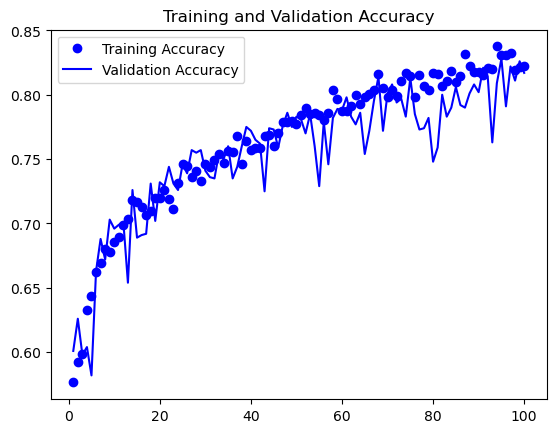

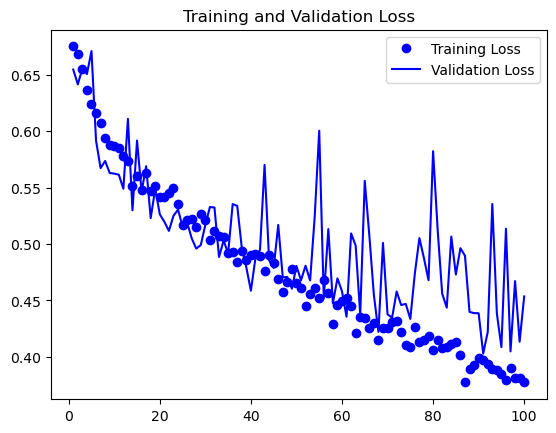

In [50]:
model.save('cats_and_dogs_small_2.h5')

# Plotting the results

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

We observe that with data augmentation we fixed the overfitting problem, and we now have a higher validation accuracy(around 82%).

## Third model: using a pretrained convnet


In this part we'll use a pretrained convnet to improve the accuracy of our model. We will use the VGG16 model, developed by Karen Simonyan and Andrew Zisserman in 2014, a simple and widely used convnet architecture for ImageNet. 

In [53]:
conv_base = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))



58889256/58889256 [==============================] - 7s 0us/step


In [54]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [57]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 1s 600ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 613ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 575ms/step


In [58]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [60]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss = 'binary_crossentropy',
    metrics= ['acc'])

history = model.fit(train_features, train_labels, epochs=30, batch_size=30, validation_data=(validation_features, validation_labels))

Epoch 1/30
67/67 [==============================] - 2s 20ms/step - loss: 0.6272 - acc: 0.6465 - val_loss: 0.4727 - val_acc: 0.8090
Epoch 2/30
67/67 [==============================] - 1s 19ms/step - loss: 0.4632 - acc: 0.7815 - val_loss: 0.3894 - val_acc: 0.8630
Epoch 3/30
67/67 [==============================] - 1s 19ms/step - loss: 0.3927 - acc: 0.8245 - val_loss: 0.3488 - val_acc: 0.8680
Epoch 4/30
67/67 [==============================] - 1s 19ms/step - loss: 0.3484 - acc: 0.8570 - val_loss: 0.3212 - val_acc: 0.8750
Epoch 5/30
67/67 [==============================] - 1s 19ms/step - loss: 0.3168 - acc: 0.8665 - val_loss: 0.3049 - val_acc: 0.8780
Epoch 6/30
67/67 [==============================] - 1s 19ms/step - loss: 0.2930 - acc: 0.8830 - val_loss: 0.2947 - val_acc: 0.8830
Epoch 7/30
67/67 [==============================] - 1s 19ms/step - loss: 0.2685 - acc: 0.8895 - val_loss: 0.2832 - val_acc: 0.8850
Epoch 8/30
67/67 [==============================] - 1s 19ms/step - loss: 0.2600 - a

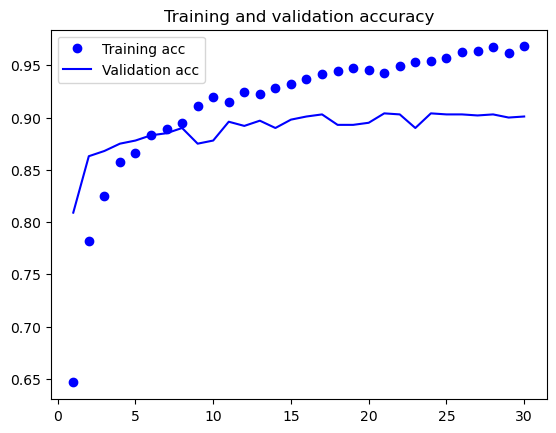

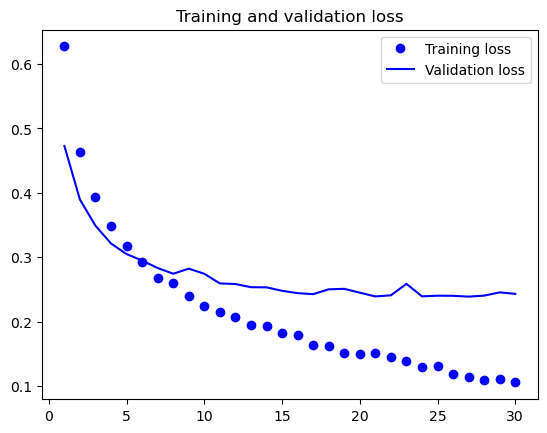

In [62]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


The model tends to overfit after  6-7 epochs, but with that we have an accuracy of 90% on the validation set, which demonstrates the power of transfer learning. The problem of overfitting comes from the fact that we have a small dataset, so one way to fix this problem is to use data augmentation.

To be able to use data augmentation with a pretrained model we should use a different method, we will add our model on top of the pretrained model.

## Fourth model: using a pretrained convnet with data augmentation(Freeze the convolutional base)

In [63]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [64]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


As we observe the trainable parameters of a vgg16 model are 14714688, so we will freeze the convolutional base and only train the classifier.

In [65]:
conv_base.trainable = False

In [68]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [67]:
len(model.trainable_weights)

4

In [69]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(lr=2e-5),
        metrics=['acc'])
        
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/tmp/ipykernel_11024/1213455767.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 94s 937ms/step - loss: 0.5805 - acc: 0.7100 - val_loss: 0.4524 - val_acc: 0.8170
Epoch 2/30
100/100 [==============================] - 91s 913ms/step - loss: 0.4841 - acc: 0.7790 - val_loss: 0.3788 - val_acc: 0.8490
Epoch 3/30
100/100 [==============================] - 91s 909ms/step - loss: 0.4339 - acc: 0.8000 - val_loss: 0.3371 - val_acc: 0.8630
Epoch 4/30
100/100 [==============================] - 91s 908ms/step - loss: 0.4011 - acc: 0.8195 - val_loss: 0.3114 - val_acc: 0.8670
Epoch 5/30
100/100 [==============================] - 90s 905ms/step - loss: 0.3863 - acc: 0.8320 - val_loss: 0.2970 - val_acc: 0.8790
Epoch 6/30
100/100 [==============================] - 91s 912ms/step - loss: 0.3689 - acc: 0.8385 - val_loss: 0.2943 - val_acc: 0.8830
Epoch 7/30
100/100 [==============================] - 93s 929ms/step - loss: 0.3614 - acc: 0.8440 - val_loss: 0.2775 - val_acc: 0.8880
Epoch 8/30
100/100 [==============================] - 89s 895ms/st

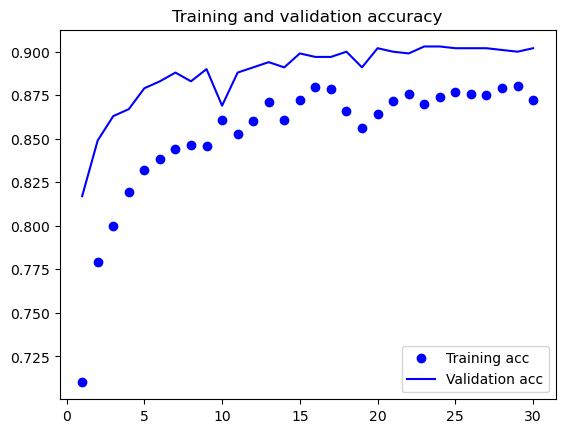

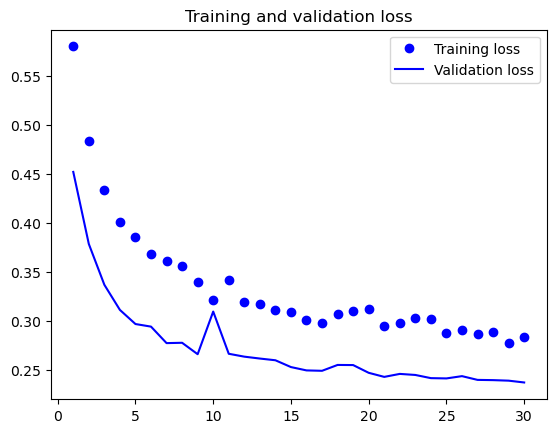

In [73]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()